**About Dataset**

Column Explanation:

+ istance_from_home - the distance from home where the transaction happened.
+ distance_from_last_transaction - the distance from last transaction happened.
+ ratio_to_median_purchase_price - Ratio of purhased price transaction to median purhase price.
+ repeat_retailer - Is the trasaction happen from same retailer
+ used_chip - Is the transaction through chip (credit card)
+ used_pin_number - Is the transaction happen by using PIN number.
+ online_order - Is the transaction an online oreder.
+ fraud - Is the transaction fraudulent.

**IMPORTING MODULES**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**DATA OVERVIEW**

In [2]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.shape

(1000000, 8)

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
# Sum of missing values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
# Check duplicated rows
df.duplicated().sum()

0

In [7]:
# unique values
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


### Exploratory Data Analysis (EDA) & Data Visualization

**Approach:**
+ Visualize some categorical features to see their distribution
+ Plot some correlation plots between our target variable and some featureset
+ Document some visual insights

In [10]:
# full correlation table
df.corr().style.background_gradient(cmap='viridis')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


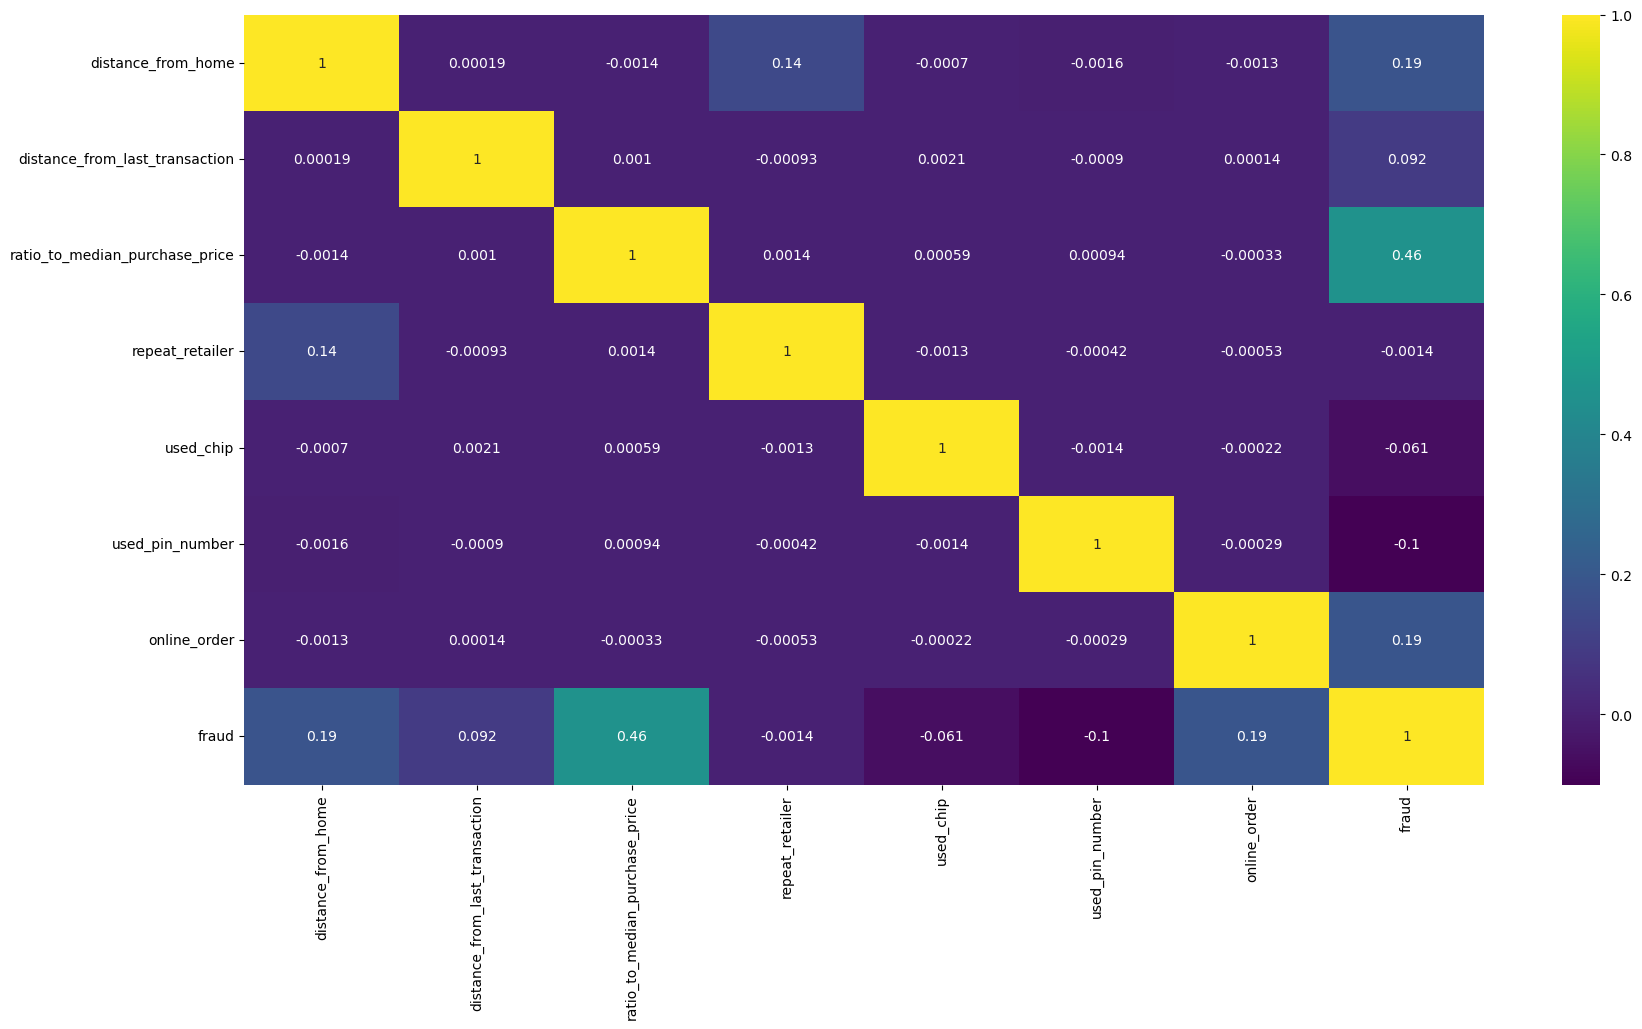

In [11]:
# Heatmap to show the correlation between the features as the table above
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap='viridis')
plt.show()

**UNIVARIATE ANALYSIS**

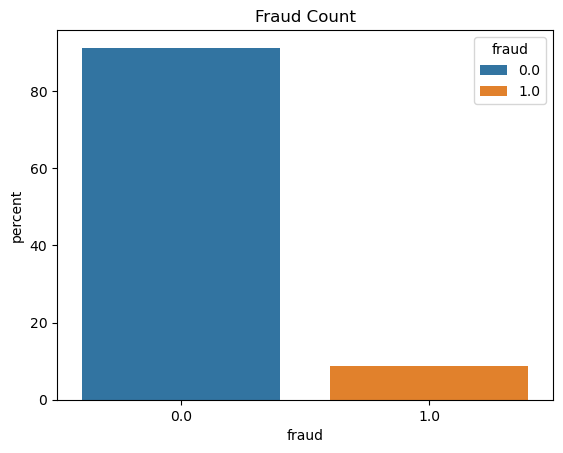

In [12]:
sns.countplot(x = 'fraud', hue='fraud', data=df, stat='percent')
plt.title('Fraud Count')
plt.show()

In [13]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

**Thoughts**
The dataset is imbalanced, there are significantly more labels as 'not-fraud' than as 'fraud' which could cause our model to recodnize more of 'not-fraud' patterns than of 'fraud'

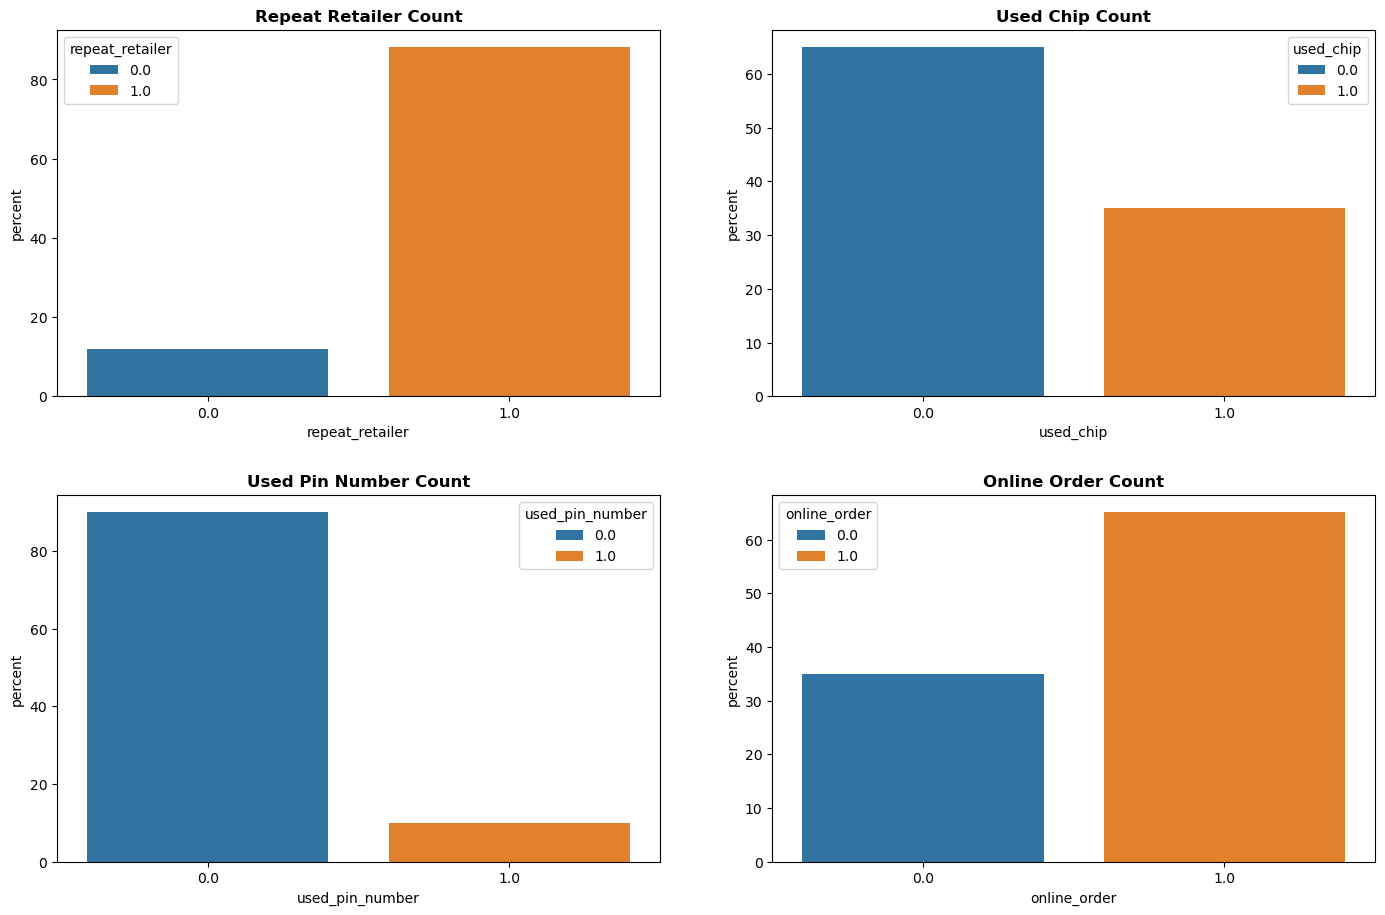

In [14]:
# Visualize categorical Variables

fig, ax = plt.subplots( 2, 2, figsize=(15,10))

fig.tight_layout(pad=5.0)

sns.countplot(x = 'repeat_retailer', hue='repeat_retailer', data = df, stat='percent', ax = ax[0,0])
ax[0][0].set_title('Repeat Retailer Count', weight = 'bold')

sns.countplot(x = 'used_chip', hue='used_chip', data = df, stat='percent', ax = ax[0][1])
ax[0][1].set_title('Used Chip Count', weight = 'bold')

sns.countplot(x = 'used_pin_number', hue='used_pin_number', data = df, stat='percent', ax = ax[1][0])
ax[1][0].set_title('Used Pin Number Count', weight = 'bold')

sns.countplot(x = 'online_order', hue='online_order', data = df, stat='percent', ax = ax[1][1])
ax[1][1].set_title('Online Order Count', weight = 'bold')

plt.show()

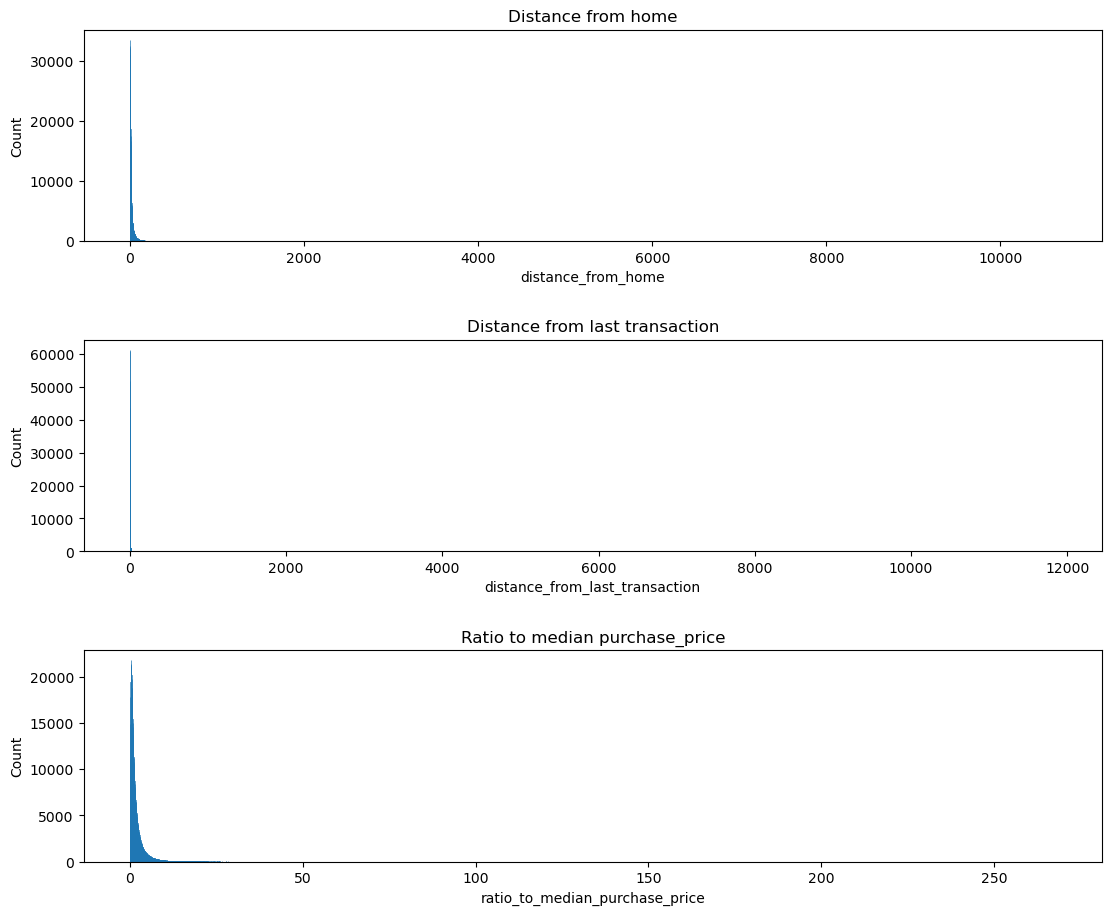

In [15]:
fig,ax =  plt.subplots( 3, 1,
                       figsize = (12, 10))
fig.tight_layout(pad=5.0)

sns.histplot(data=df, x="distance_from_home", fill=False, ax = ax[0])
ax[0].set_title('Distance from home')

sns.histplot(data=df, x="distance_from_last_transaction", fill=False, ax = ax[1])
ax[1].set_title('Distance from last transaction')

sns.histplot(data=df, x="ratio_to_median_purchase_price", fill=False, ax = ax[2])
ax[2].set_title('Ratio to median purchase_price')

plt.show()

**BIVARIATE ANALYSIS**

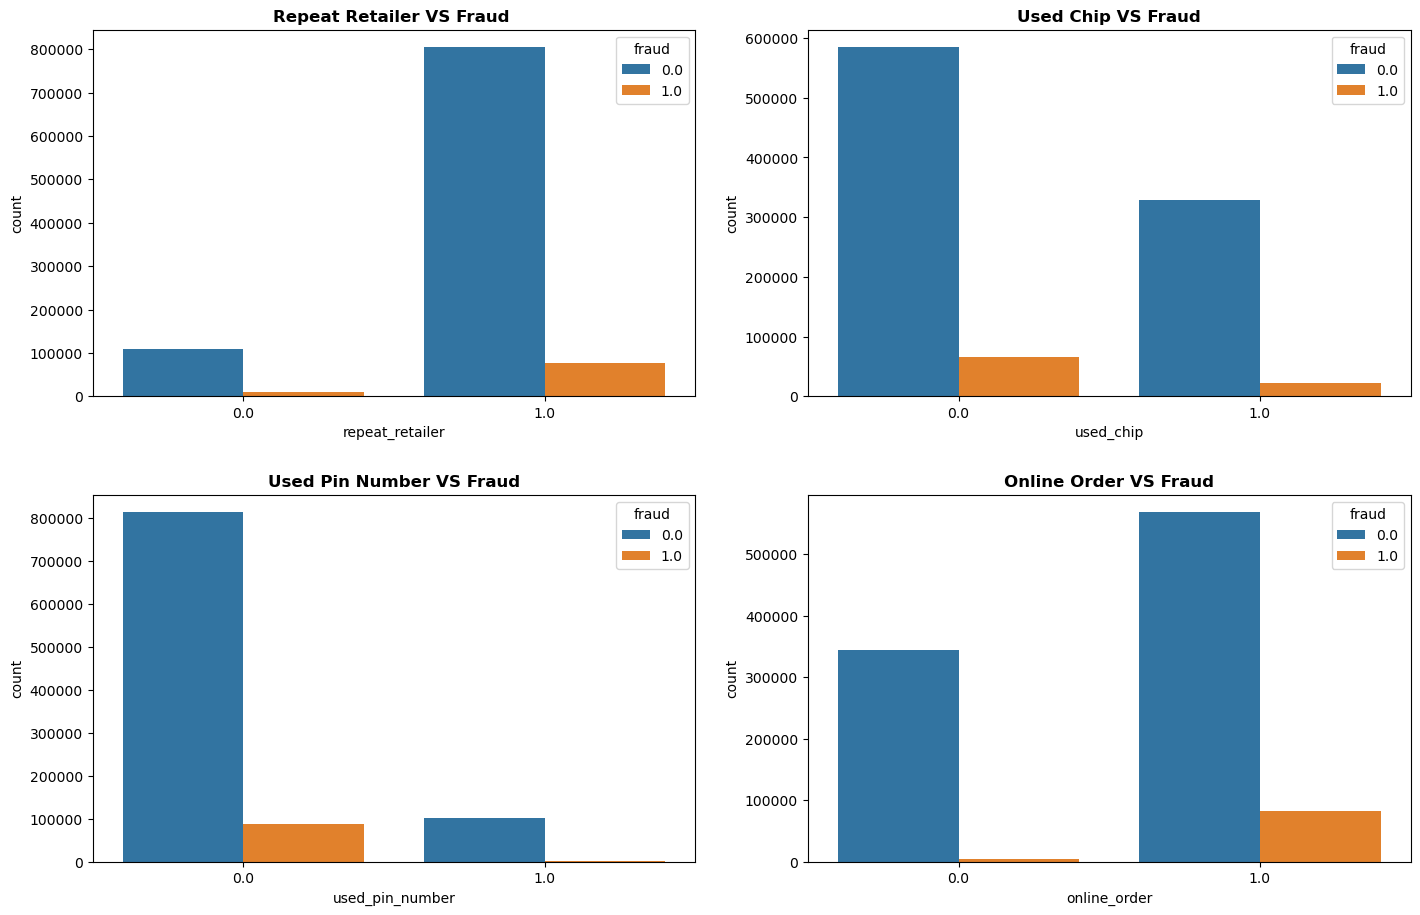

In [16]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 15, 10))
  
fig.tight_layout(pad=5.0)

sns.countplot(x = 'repeat_retailer', data = df, hue='fraud', ax = ax[0][0])
ax[0][0].set_title('Repeat Retailer VS Fraud ', weight = 'bold')

sns.countplot(x = 'used_chip', data = df, hue='fraud', ax = ax[0][1])
ax[0][1].set_title('Used Chip VS Fraud', weight = 'bold')

sns.countplot(x = 'used_pin_number', data = df, hue='fraud', ax = ax[1][0])
ax[1][0].set_title('Used Pin Number VS Fraud', weight = 'bold')

sns.countplot(x = 'online_order', data = df, hue='fraud', ax = ax[1][1])
ax[1][1].set_title('Online Order VS Fraud', weight = 'bold')

plt.show()

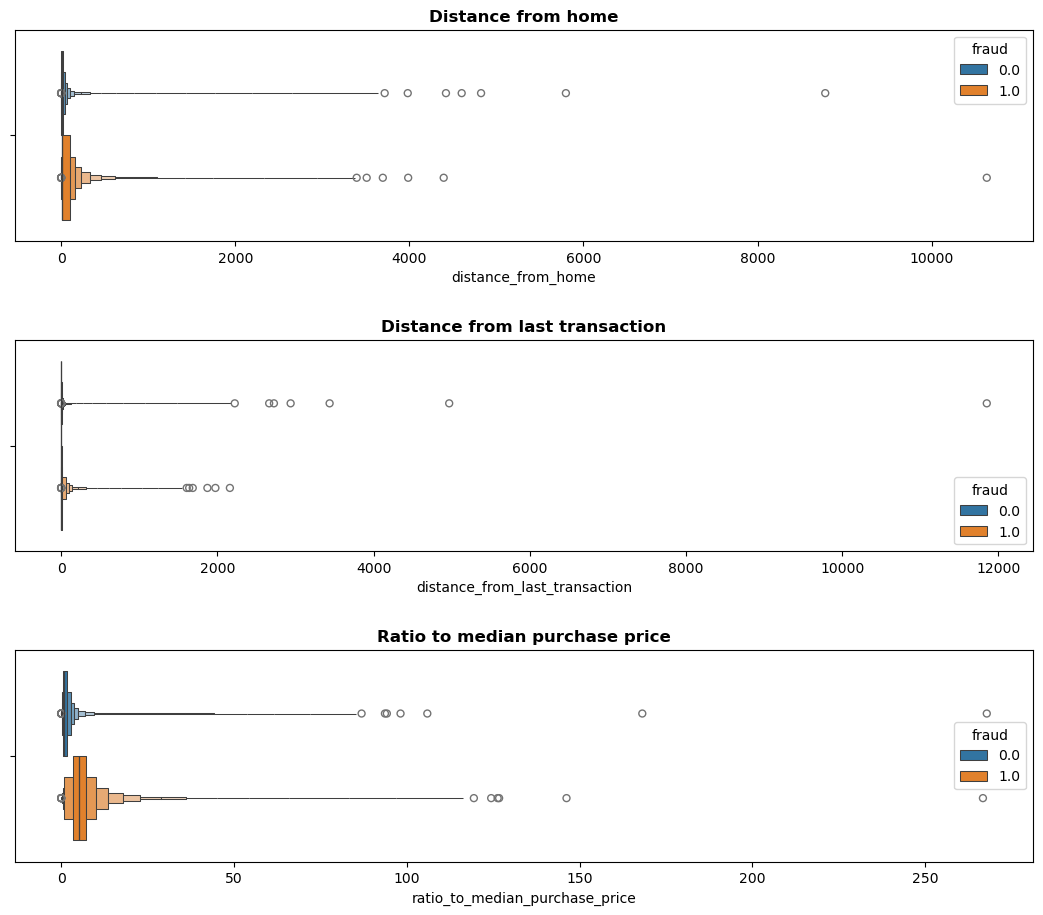

In [17]:
fig,ax =  plt.subplots( 3, 1,
                       figsize = (12, 10))
fig.tight_layout(pad=5.0)

sns.boxenplot(data=df, x="distance_from_home", hue="fraud", ax = ax[0])
ax[0].set_title('Distance from home',weight = 'bold')

sns.boxenplot(data=df, x="distance_from_last_transaction", hue="fraud", ax = ax[1])
ax[1].set_title('Distance from last transaction',weight = 'bold')

sns.boxenplot(data=df, x="ratio_to_median_purchase_price", hue="fraud", ax = ax[2])
ax[2].set_title('Ratio to median purchase price',weight = 'bold')

plt.show()

**DATA SPLITTING**

In [20]:
# importing modules for preprocessing and model building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report

# Machine Learning Model
from sklearn.linear_model import LogisticRegression

In [21]:
# Data splitting and preprocessing

features = df.columns.drop(['fraud'])
target = 'fraud'

X = df[features]
y = df[target]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42, stratify=y)
print('X training shape = ', X_train.shape)
print('y training shape = ', y_train.shape)
print('X test shape     = ', X_test.shape)
print('y training shape = ', y_test.shape)

X training shape =  (800000, 7)
y training shape =  (800000,)
X test shape     =  (200000, 7)
y training shape =  (200000,)


**DATA PREPROCESSING & NORMALIZATION**

In [25]:
# RESCALING OUR FEATURES USING sTANDARDsCALER
scaler = StandardScaler()
# fit the data
scaler.fit(X_train)

# transform our training data
X_train = scaler.transform(X_train)

# Tramsform our training data
X_test = scaler.transform(X_test)

In [27]:
X_train[:3]

array([[-0.35354111,  0.08304936, -0.57372634,  0.36682676,  1.36114699,
        -0.33463274,  0.73267685],
       [-0.17568325, -0.15658031,  0.31517042,  0.36682676,  1.36114699,
        -0.33463274,  0.73267685],
       [ 0.07846709, -0.07031898, -0.53958994,  0.36682676, -0.73467451,
        -0.33463274,  0.73267685]])

**MODEL BUILDING**

In [28]:
# Logistics Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predit on our test data
y_pred = model.predict(X_test)

In [30]:
print('Classifiaction Report')
print(classification_report(y_test, y_pred))

Classifiaction Report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.61      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[181295   1224]
 [  6896  10585]]


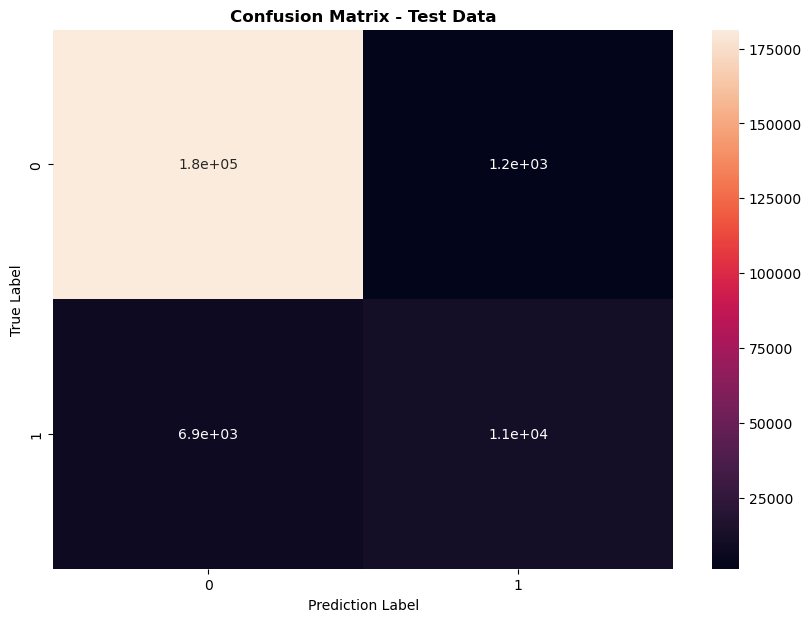

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix - Test Data', weight='bold')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()